In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-v0_8-poster")
%matplotlib inline

## Intro To Waves

This jpyter notebook is based on the chapter 24 in the book Python $\textbf{Programming and Numerical Methods - A Guide for Engineers and Scientists}$ 
by $\textbf{Qingkai Kong,Timmy Siauw,Alexandre M. Bayen}$ 

This code demonstrates how different sound waves can combine to create more complex waveforms. First, it creates a timeline of 100 evenly spaced points across one second. Using this timeline, it generates three distinct sine waves with different properties. The first wave has high amplitude (3 units) and completes 7 cycles per second, with a phase shift of 180 degrees. The second wave has medium amplitude (1 unit) and makes 4 cycles per second. The third wave has low amplitude (0.5 units) and completes 10 cycles per second, with a small phase shift of 10 degrees. \
Tweaking sine waves in this form: 
<p style="text-align: center;">$y(t) = A sin(\omega t +\varphi)$</p>
$A$ (Amplitude) - The height or strength of the wave. In the code, the first wave has $A=3$, second has $A=1$, and third has $A=0.5$. <br>
$\omega$ (Angular Frequency) - How many complete cycles the wave makes per second, measured in radians. In the code, it's written as $2\pi$ times the frequency (e.g., $2\pi \cdot 7$ for the first wave).<br>
$\phi$ (Phase) - The starting position of the wave. In the code, the first wave has $\phi=180°$, shifting its starting point, while the third has $\phi=10°$.<br>
The code creates a time array of 100 evenly spaced points between 0 and 1 second, where sampling_interval = 0.01 seconds determines the spacing between measurements, giving us a sampling rate of 100 Hz.<br>
To sample the wave guaranteed correctly the frequency must be less than half the sample rate - this is a fundamental principle in digital signal processing called the Nyquist theorem.

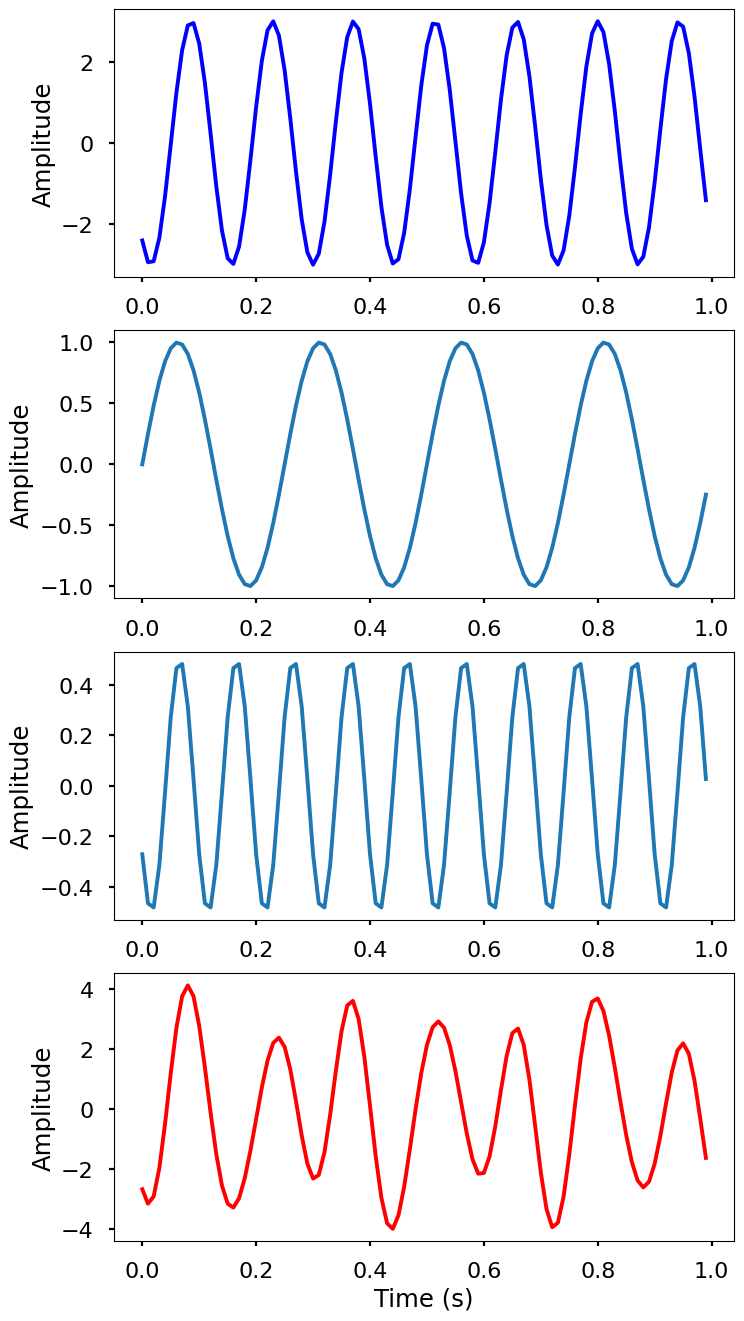

In [16]:
samples = 100
sampling_interval = 1/samples

time = np.arange(0,1,sampling_interval)

# frequenz muss echt kleiner als samples/2 sein
sin_1 = 3*np.sin(2*np.pi*7*time + 180)
sin_2 = np.sin(2*np.pi*4*time)
sin_3 = .5*np.sin(2*np.pi*10*time + 10)


plt.figure(figsize=(8,16))
plt.subplot(411)
plt.plot(time,sin_1, "b")
plt.ylabel("Amplitude")

plt.subplot(412)
plt.plot(time,sin_2)
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(time,sin_3)
plt.ylabel("Amplitude")
# Überlagerung der drei sinusschwingungen
plt.subplot(414)
plt.plot(time,sin_2+sin_1+sin_3, "r")
plt.ylabel("Amplitude")

plt.xlabel("Time (s)")
plt.show()

The last plot is the sum of the three sine waves. <br>
The overlapping of sine waves is visualized in the picture below showing on the left the Timedomain perspective in red and on the left the Frequencydomain with bars for each natural sine wave in the composite wave. The height of the bars represents the amplitude of each natural sine wave.
<div align="center">
<img src="waves.jpeg" width="500" alt="Alt text">
</div>
<div align="center">
<sup>Kong, Q., Siauw, T., & Bayen, A. (2020). Python programming and numerical methods: A guide for engineers and scientists. Academic Press.</sup>
</div>


## Implementation of the DFT
The Discrete Fourier Transform (DFT) converts a finite sequence of samples from a time-based signal into a sequence that represents the signal's frequency components, revealing both the amplitude and phase of each frequency present in the original signal.<br>
My implementation of the DFT by the Formula below from scratch (cell below):
<div align="center" style="font-size: 1.5em">    
$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i2\pi kn/N} = \sum_{n=0}^{N-1} x_n[\cos(2\pi kn/N) - i \cdot \sin(2\pi kn/N)]$
</div>

- $N = \text{number of samples}$
- $n = \text{current sample}$
- $k = \text{current frequency, where } k \in [0, N-1]$
- $x_n = \text{the sine value at sample } n$
- $X_k = \text{the DFT that includes information of both amplitude and phase}$

Usage of this DFT implementation in cells below

In [17]:
def DFT(x):
    N = len(x)
    # ist die DFT über nur die frequenz k 
    # die gesamte DFT bildet ein array über alle frequenzen 0 bis N-1
    X = np.zeros(N, dtype=complex)
    # frequency index
    for k in range(N):
        X_k = 0
        # time/space index
        for n in range(N):
            X_k += x[n] * np.e ** ((-2j*np.pi*k*n)/N)
        X[k] = X_k        
    return X


## Calculating Amplitude and Phase
The complex number $X_k$ contains both amplitude and phase information of the frequency component $e^{i2\pi kn/N}$ in the original signal $x_n$.

### Amplitude
This formula calculates the amplitude of frequency component $k$ where:

- $|X_k|$ is the magnitude of the complex DFT value
- $N$ is the number of samples
- $\Re(X_k)$ and $\Im(X_k)$ are the real and imaginary parts of $X_k$

$$\text{amp} = \frac{|X_k|}{N} = \frac{\sqrt{\left[\Re(X_k)\right]^2 + \left[\Im(X_k)\right]^2}}{N}$$

The code below performs a Discrete Fourier Transform (DFT) analysis on a composite signal made up of the three sine waves (with frequencies of 4Hz, 7Hz, and 10Hz) by calculating the amplitude of each frequency component from 1-10Hz (changeble frequency intervall). <br>
Every occurring amplitude in the composite signal is filtered by beeing greater than a selected $\varepsilon$ environment around $0$.

In [44]:
# AMPLITUDE
# Zusammengesetzte Funktion aus sin_1, sin_2 und sin_3
'''
sin_1 = 3*np.sin(2*np.pi*7*time + 180)
sin_2 = np.sin(2*np.pi*4*time)
sin_3 = .5*np.sin(2*np.pi*10*time + 10)
'''
func = sin_1+sin_2+sin_3
N = len(func)
'''
Hier wird keine DFT über alle Frequenzen gemacht, sondern nur eine DFT 
über eine bestimmte Frequenz, die durch die Variable frequency bestinmt wird
'''

#iteration über die frequenzen 1 - 10, da in der überlagerten sinusfunktion reine wellen mit den frequenzen 7Hz,4Hz und 10Hz vorkommen
for frequency in range(1,11):
    #es wird über alle smples iteriert 
    X_k = 0
    for n in range(N):
                # DFT
                X_k += func[n] * np.e ** ((-2j*np.pi*frequency*n)/N)
    # gibt die Amplitude der Teilfunktion von func mit der frequenz requency aus 
    # frage : laut der formel oben müsste die amplitude herauskommen, aber es ist nur die hälfte
    # deshalb habe ich das Ergebnis noch mal 2 genommen
    amplitude = 2 *(np.sqrt(X_k.real ** 2 + X_k.imag ** 2))/N 
    epsilon = 0.0000000001
    if amplitude > epsilon :print(amplitude)



0.9999999999999944
3.0
0.5000000000000009


### Phase
The phase angle of $X_k$ can be calculated from its imaginary $\Im(X_k)$ and real parts $\Re(X_k)$ using the two-argument arctangent $\text{atan2}$.
$$\text{phase} = \text{atan2}(\Im(X_k), \Re(X_k))$$


In [51]:
# PHASE
# Zusammengesetzte Funktion aus sin_1, sin_2 und sin_3
func = sin_1+sin_2+sin_3
X_k = 0
'''
Hier wird keine DFT über alle Frequenzen gemacht, sondern nur eine DFT 
über eine bestimmte Frequenz, die durch die Variable frequency bestinmt wird

sin_1 = 3*np.sin(2*np.pi*7*time + 180)
sin_2 = np.sin(2*np.pi*4*time)
sin_3 = .5*np.sin(2*np.pi*10*time + 10)
'''
N = samples
frequency = 7
#es wird über alle smples iteriert 
for n in range(N):
    X_k += func[n] * np.e ** ((-2j*np.pi*frequency*n)/N)
phase = np.atan2(X_k.imag, X_k.real)
print(phase)

2.5000150721766827


## Plotting the DFT

The Nyquist-Shannon sampling theorem states that a continuous signal can be perfectly reconstructed if the sampling rate exceeds twice the highest frequency present in the signal.<br>
In the Discrete Fourier Transform (DFT) of a real signal, this principle manifests as symmetry in the frequency spectrum around the Nyquist frequency.<br>
The plot below has not a normalized amplitude.

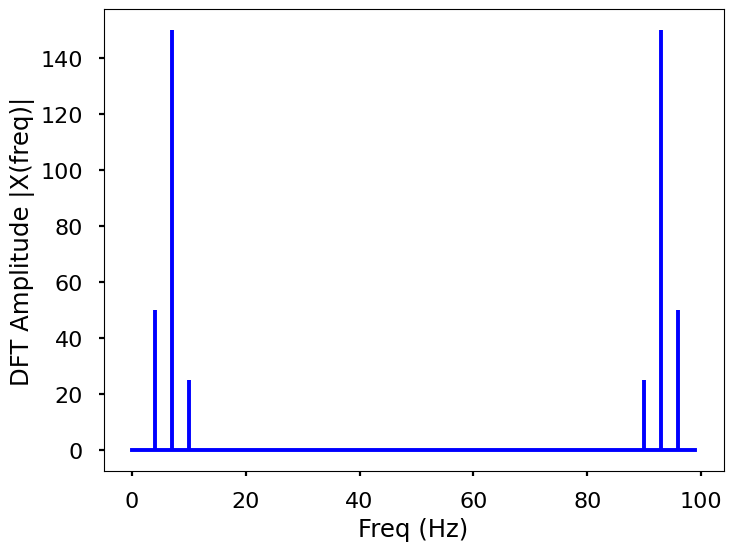

In [54]:
X = DFT(sin_2+sin_1+sin_3)

N = len(X)
n = np.arange(N)
T = N/samples
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.show()

Due to the symmetry the frequency axis can be halved.<br>
If the complex DFT values are Normalized, then the y-axis shows the exact amplitude value for each frequency.

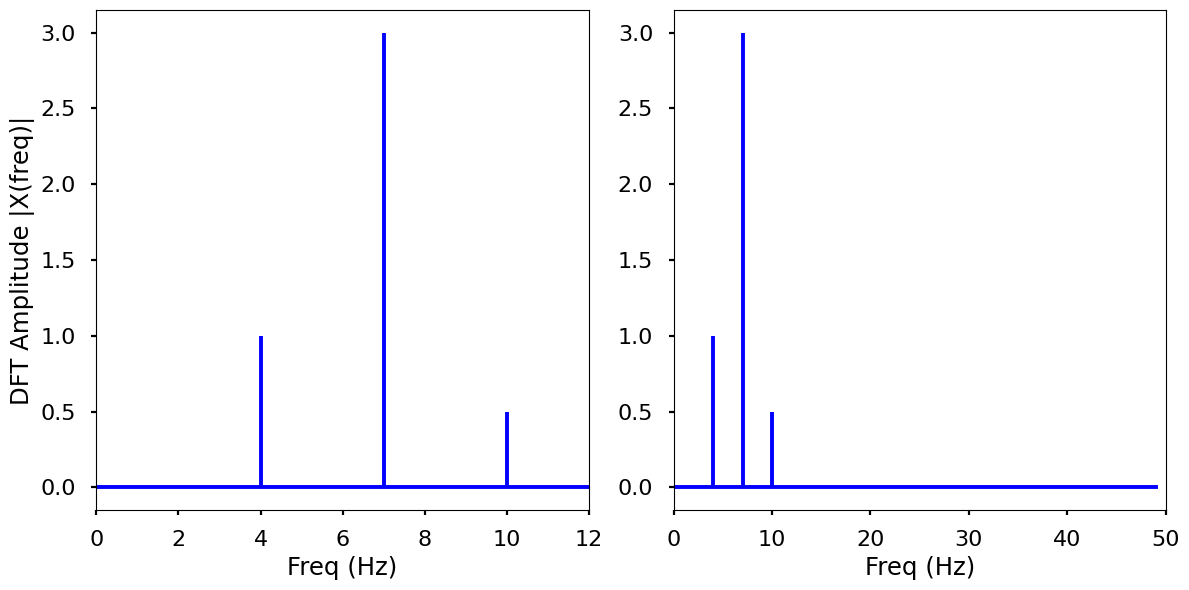

In [58]:
n_oneside = N//2
# linke hälfte der frequenzen
f_oneside = freq[:n_oneside]
# Amplitude normalisieren
X_oneside =X[:n_oneside]/n_oneside
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside , abs(X_oneside), "b", markerfmt=" ", basefmt="-b")
plt.xlim(0,12)
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)|")
plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.xlim(0, 50)
plt.tight_layout()
plt.show()